In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import itertools


import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))

In [3]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [4]:
verbs_adverbs = pickle.load(open("pickle_files/verbs_adverbs.pkl", "rb" ))

In [5]:
simple_text = pickle.load(open("pickle_files/simple_text.pkl", "rb" ))

In [6]:
not_happening = pickle.load(open("pickle_files/not_happening.pkl", "rb" ))

In [7]:
how_can_this_happen = pickle.load(open("pickle_files/how_can_this_happen.pkl", "rb" ))

In [8]:
final_round = pickle.load(open("pickle_files/final_round.pkl", "rb" ))

In [35]:
final_round_clean = pickle.load(open("pickle_files/final_round_clean.pkl", "rb" ))

In [36]:
def count_letters(words):
    length = []
    for x in words:
        length.append(len(x))
    return sum(length)

In [60]:
count_letters(final_round_clean)

7587010

In [61]:
tfidf = TfidfVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   #token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
cor_tfidf = tfidf.fit_transform(final_round_clean)

In [ ]:
with open('cor_tfidf.pkl', 'wb') as picklefile:
        pickle.dump(cor_tfidf, picklefile)

In [7]:
tfidf = pickle.load(open("pickle_files/tfidf.pkl", "rb" ))
cor_tfidf = pickle.load(open("pickle_files/cor_tfidf.pkl", "rb" ))

In [ ]:
with open('tfidf.pkl', 'wb') as picklefile:
        pickle.dump(tfidf, picklefile)

In [62]:
lsa = TruncatedSVD(140, algorithm = 'arpack')
corpus_lsa = lsa.fit_transform(cor_tfidf)
corpus_lsa = Normalizer(copy=False).fit_transform(corpus_lsa)

In [8]:
lsa = pickle.load(open("pickle_files/lsa.pkl", "rb" ))
corpus_lsa = pickle.load(open("pickle_files/corpus_lsa.pkl", "rb" ))

In [71]:
with open('lsa.pkl', 'wb') as picklefile:
        pickle.dump(lsa, picklefile)

OSError: [Errno 22] Invalid argument

In [ ]:
with open('corpus_lsa.pkl', 'wb') as picklefile:
        pickle.dump(corpus_lsa, picklefile)

In [63]:
sum(lsa.explained_variance_ratio_)

0.09518774039768298

In [64]:
terms = tfidf.get_feature_names()

In [65]:
for i, comp in enumerate(lsa.components_):
    Terms_in_Comp = zip(terms,comp)
    sorted_Terms = sorted(Terms_in_Comp, key = lambda x: x[1], reverse=True) [:10]
    print("Topic %d:" %i)
    for term in sorted_Terms:
        print(term[0])
    print(" ")

Topic 0:
2018
political
atblog
like
apolitical
says
2018 atblog
2018 atblog apolitical
atblog apolitical
north
 
Topic 1:
tech
lifestyle
watch
military
2018 reserved
2018 reserved delayed
2018 reserved delayed 20
clips newsroom
delayed 20
drones video
 
Topic 2:
free
survive
free survive
script
add
initial
daily
human
national
united
 
Topic 3:
north
korean
nuclear
white
north korean
russian
south
told
national
united
 
Topic 4:
north
korean
north korean
nuclear
south
south korean
jong
yong
kim
north said
 
Topic 5:
pubdate
episode
national
mcardle
religious
writer national
writer
1000 prelimdate
1000 prelimdate pubdate
1000 prelimdate pubdate getutcfullyear
 
Topic 6:
10 10
override
10
10 10 10
adspl
adspl override
adspl override netid
adspl override netid try
adtech_call_type
adtech_call_type switch
 
Topic 7:
nuclear
syrian
israeli
global
iranian
united
military
russian
european
international
 
Topic 8:
holistic
catherine
grieving
available
nuclear
plus
published
probably
medicinal


Topic 80:
rural
moser
gay
opioid
going
pardon
ms
ms 13
told
million
 
Topic 81:
torshin
muslim
general
spanish
mekelburg
23 2018
military
23
political
yahoo
 
Topic 82:
hurricane
post hurricane
foreign
illegal
korean
obama
cooper
born
ms 13
gun
 
Topic 83:
torshin
planned
sexual
spanish
ms 13
ms
senate
13
billion
yahoo
 
Topic 84:
military
torshin
love
constitutional
black
born
political
american
foreign born
national
 
Topic 85:
torshin
supreme
spanish
south
yahoo
al
cia
al kildani
kildani
ms 13
 
Topic 86:
rural
deflected
pardon
concerned
mccarthy
pardoning
texas
dinesh
supreme
illegal
 
Topic 87:
black
texas
korean
obama
senate
north korean
abbott
empathy
american
supreme
 
Topic 88:
planned
torshin
sexual
born
million
foreign born
global
spanish
rural
29 2018
 
Topic 89:
south
economic
korean
ms 13
ms
financial
year
old
iranian
year old
 
Topic 90:
29 2018
29
reporting bozorgmehr
bozorgmehr
quoted saying
bozorgmehr editing
reporting bozorgmehr editing
quoted saying reporting
saying

In [66]:
import os

os.system('say "Your move.....Commander"')

0

In [44]:
SSEs = []
Sil_coefs = []
for k in range(100, 300):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(corpus_lsa)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(corpus_lsa, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

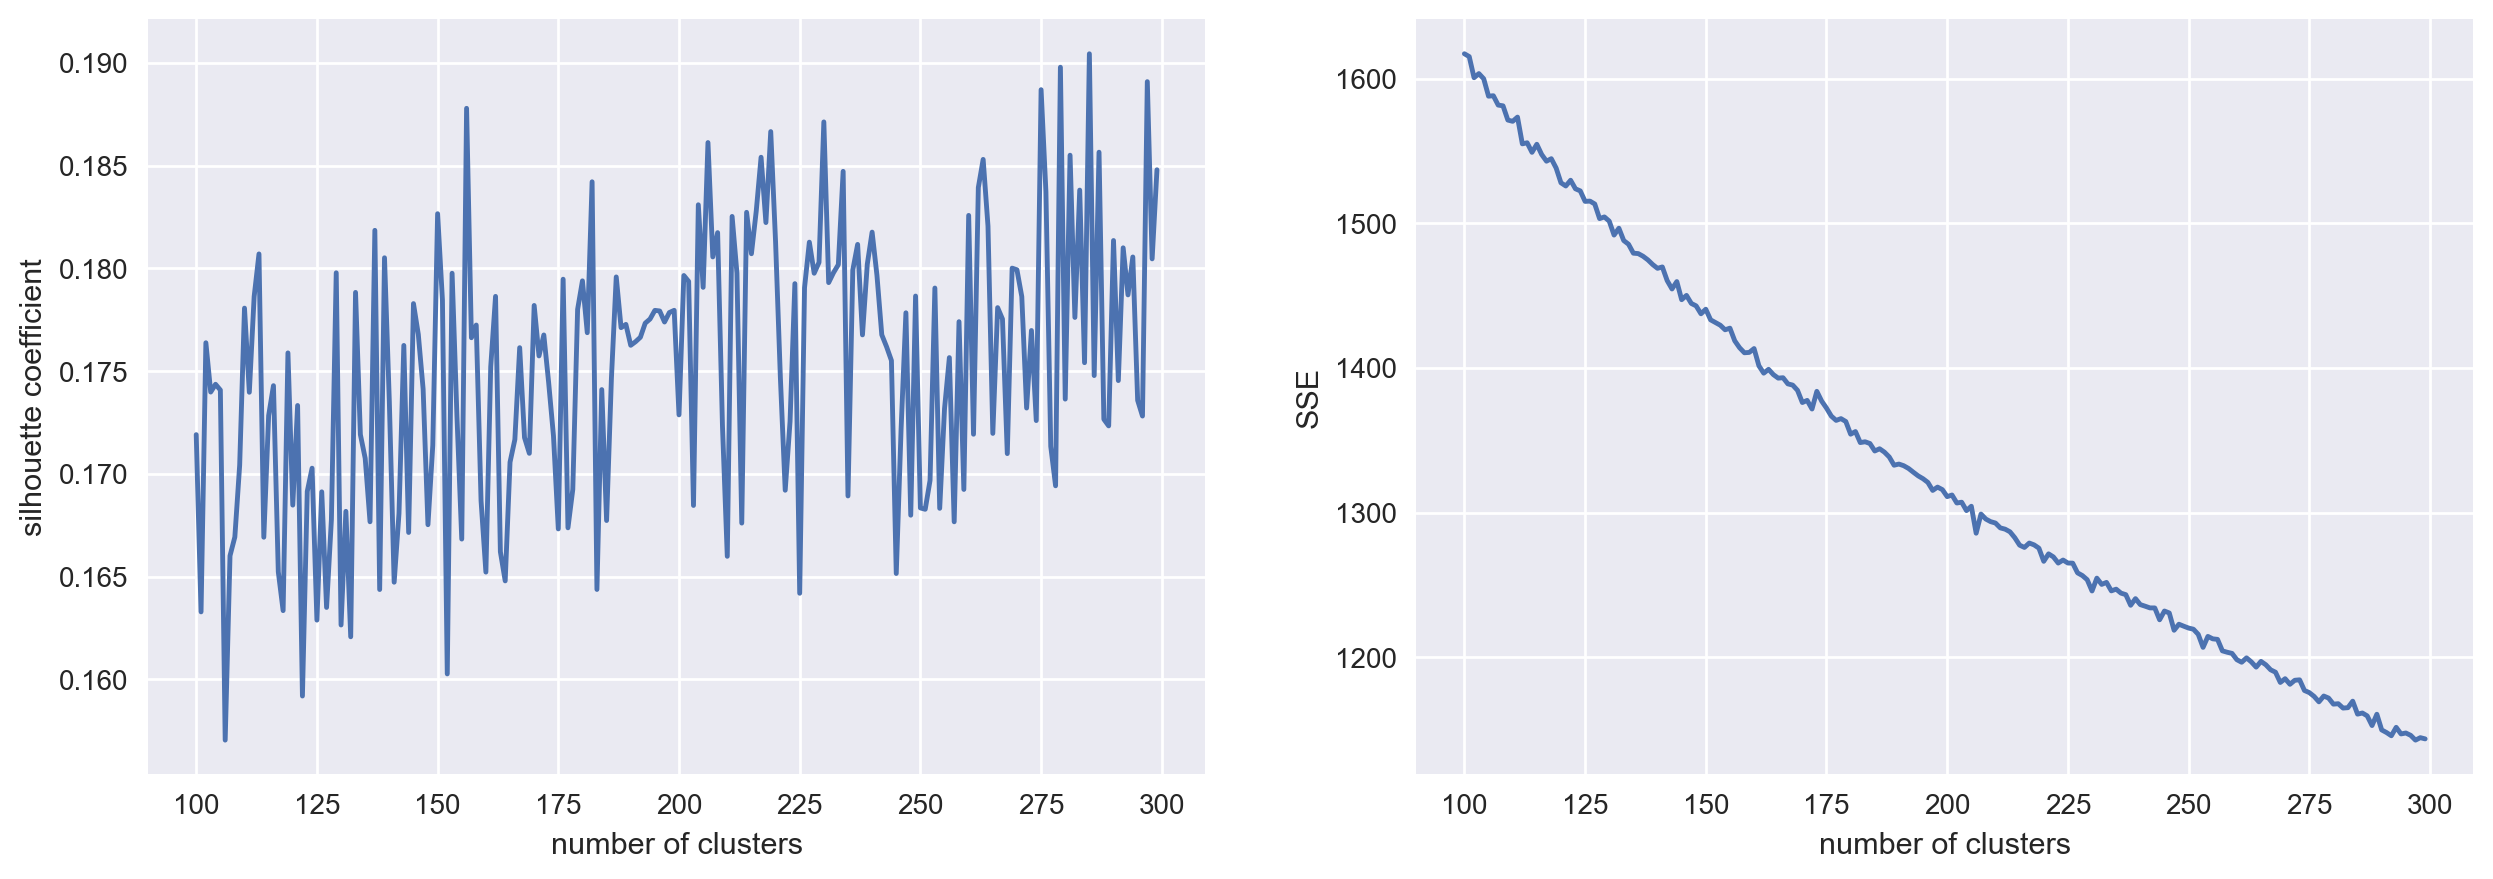

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(100,300)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [72]:
import os

os.system('say "Job\'s done"')

0

In [46]:
km = KMeans(n_clusters=300)
clusts = km.fit_predict(corpus_lsa)

In [70]:
with open('km.pkl', 'wb') as picklefile:
        pickle.dump(km, picklefile)

In [47]:
len(clusts)

4092

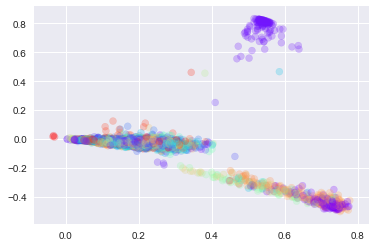

In [88]:
plt.scatter(corpus_lsa[:, 0], corpus_lsa[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)


In [27]:
from sklearn.manifold import TSNE
#Fits t-SNE for visualization
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(corpus_lsa)

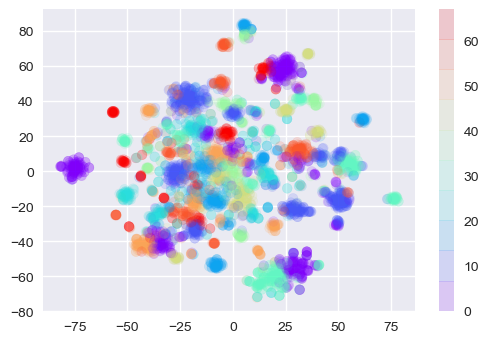

In [28]:
#Graphs t-SNE
plt.figure(dpi=100)

cmap = plt.cm.get_cmap('rainbow', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], c=clusts, cmap=cmap, alpha = 0.15)
#plt.xlim(-20,30)
#plt.ylim(-30,-10)
plt.colorbar()
plt.clim()

In [48]:
true_df['clusters'] = clusts

In [41]:
with open('true_df_clusts.pkl', 'wb') as picklefile:
        pickle.dump(true_df, picklefile)

In [11]:
true_df = pickle.load(open("pickle_files/true_df_clusts.pkl", "rb" ))

In [32]:
true_df.head()

body  num_source   source  \
0  The following statements were posted to the ve...         2.0  Reuters   
1  TEL AVIV (Reuters) - Donald Trump’s attorney, ...         2.0  Reuters   
2  WASHINGTON (Reuters) - U.S. House of Represent...         2.0  Reuters   
3  BRUSSELS (Reuters) - U.S. Defense Secretary Ji...         2.0  Reuters   
4  WASHINGTON/MORRISTOWN, N.J. (Reuters) - A lawy...         2.0  Reuters   

                                               title  clusters  
0  Trump on Twitter (June 6): Mitch McConnell, Jo...        53  
1  Giuliani says Mueller's investigators trying t...        80  
2  House Speaker doubtful of NAFTA passage in cur...       108  
3  In Europe, Mattis is in familiar spot: calming...        79  
4  Lawyer to ex-Trump campaign aide Manafort taps...         9

In [20]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [49]:
true_df.clusters.value_counts()

286    108
2      104
6       76
112     62
64      48
271     45
137     42
38      40
103     38
280     37
175     34
19      34
232     34
146     33
111     32
65      31
168     29
189     29
156     28
147     28
23      28
148     27
24      26
10      26
241     26
116     25
226     25
166     25
255     24
245     24
      ... 
217      3
273      3
291      3
297      3
9        3
270      3
200      3
77       3
212      3
43       3
17       3
120      3
203      2
265      2
0        2
199      2
191      2
187      2
50       2
107      2
296      2
282      2
274      2
242      2
240      2
238      2
102      2
224      2
222      2
29       1
Name: clusters, Length: 300, dtype: int64

In [131]:
for x in range(119):
    largest = true_df['clusters'] == x
    clust_x_df = true_df[largest]
    print("Cluster {}\n".format(x), clust_x_df.source.value_counts())

Cluster 0
 Fox News    117
Name: source, dtype: int64
Cluster 1
 Info wars          14
Mother Jones        9
Huffington Post     4
Daily Beast         4
National Review     3
Breitbart           3
Reuters             1
Activist Post       1
Name: source, dtype: int64
Cluster 2
 Reuters            25
Daily Beast        10
Breitbart           6
Mother Jones        4
Info wars           3
Huffington Post     2
National Review     1
Activist Post       1
Name: source, dtype: int64
Cluster 3
 Alabama Today    137
Name: source, dtype: int64
Cluster 4
 Activist Post    47
Name: source, dtype: int64
Cluster 5
 National Review    10
Breitbart           7
Huffington Post     4
Info wars           3
Associate Press     2
Mother Jones        2
Daily Beast         1
Reuters             1
Name: source, dtype: int64
Cluster 6
 Daily Beast    88
Name: source, dtype: int64
Cluster 7
 Global Research    10
Huffington Post     2
Daily Beast         2
Reuters             2
Breitbart           1
Activist P

 Alabama Today      7
Huffington Post    1
Mother Jones       1
Reuters            1
Daily Beast        1
Name: source, dtype: int64
Cluster 107
 Reuters    16
Name: source, dtype: int64
Cluster 108
 Breitbart          7
Huffington Post    5
Info wars          4
Reuters            1
Name: source, dtype: int64
Cluster 109
 National Review    5
Huffington Post    3
Mother Jones       1
Name: source, dtype: int64
Cluster 110
 Reuters            22
Huffington Post     3
Info wars           2
Daily Beast         1
Mother Jones        1
Name: source, dtype: int64
Cluster 111
 Info wars          7
Mother Jones       7
Huffington Post    5
Reuters            5
National Review    4
Associate Press    2
Name: source, dtype: int64
Cluster 112
 Reuters            17
Global Research    11
National Review     6
Daily Beast         4
Mother Jones        4
Info wars           4
Huffington Post     3
Breitbart           2
Fox News            1
Name: source, dtype: int64
Cluster 113
 Activist Post    32

In [6]:
reference = true_df[['source','clusters']].pivot_table(index='clusters', columns='source', aggfunc=len)

In [67]:
X = corpus_lsa
y = true_df.source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = X_train.reshape(-1,1)
#X_test = X_test.reshape(-1,1)

In [46]:
with open('X.pkl', 'wb') as picklefile:
        pickle.dump(X, picklefile)
with open('y.pkl', 'wb') as picklefile:
        pickle.dump(y, picklefile)

In [22]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10), DecisionTreeClassifier(max_depth=None), 
          BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          SVC(probability=True), LogisticRegression(C=0.1), SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest", "Decision Tree",'Bagging Classifier','SVC','Logistic','SGD-Log']

In [35]:
dumb = DummyClassifier(strategy = "stratified", random_state=0)
dumb.fit(X_train, y_train)
print(dumb.score(X_test, y_test))
print(dumb.score(X_train, y_train))

0.10989010989010989
0.10388023220287199


In [24]:
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)
print(lm1.score(X_test, y_test))
print(lm1.score(X_train, y_train))

0.10012210012210013
0.13229453101130462


In [69]:
rf2 = pickle.load(open("pickle_files/rf2.pkl", "rb" ))

In [11]:
dt = pickle.load(open("pickle_files/dt.pkl", "rb" ))

In [ ]:
bc = pickle.load(open("pickle_files/bc.pkl", "rb" ))

In [68]:
rf2 = RandomForestClassifier(n_estimators=50)#, max_depth=15)
rf2.fit(X_train, y_train)
print(rf2.score(X_test, y_test))
print(rf2.score(X_train, y_train))

0.7423687423687424
1.0


In [32]:
X = X.reshape(-1, 1)
cross_val_score(dt, X, y, cv=10, scoring='accuracy')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([0.59903382, 0.55205811, 0.5776699 , 0.58252427, 0.61893204,
       0.61764706, 0.61764706, 0.55555556, 0.53712871, 0.57673267])

In [59]:
with open('rf2.pkl', 'wb') as picklefile:
        pickle.dump(rf2, picklefile)

In [51]:
dt = DecisionTreeClassifier(max_depth=25)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(dt.score(X_train, y_train))

0.6214896214896215
0.7011915673693859


In [54]:
with open('dt.pkl', 'wb') as picklefile:
        pickle.dump(dt, picklefile)

In [52]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
bc.fit(X_train, y_train)
print(bc.score(X_test, y_test))
print(bc.score(X_train, y_train))

0.6227106227106227
0.7008860372746716


In [44]:
with open('bc.pkl', 'wb') as picklefile:
        pickle.dump(bc, picklefile)

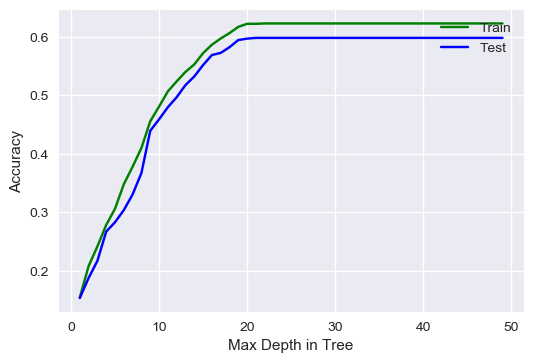

In [80]:
train_score = []
test_score = []

for depth in range(1, 50):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 50), train_score, 'g', label="Train")
plt.plot(range(1, 50), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

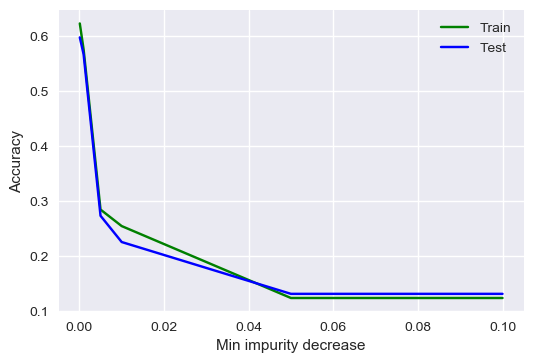

In [81]:
train_score = []
test_score = []
impurity_decrease = [.1, .05, .01, .005, .001, .0001, .0001]
for purity in impurity_decrease:
    dt = DecisionTreeClassifier(max_depth=20, min_impurity_decrease=purity)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(impurity_decrease, train_score, 'g', label="Train")
plt.plot(impurity_decrease, test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Min impurity decrease")
plt.ylabel("Accuracy");

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_imp

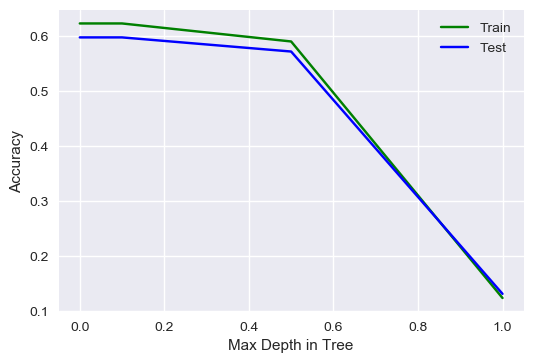

In [82]:
train_score = []
test_score = []
impurity_split = [1, .5, .1, .05, .01, .005, .001, .0001, .0001]
for purity in impurity_split:
    dt = DecisionTreeClassifier(max_depth=20, min_impurity_split=purity)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(impurity_split, train_score, 'g', label="Train")
plt.plot(impurity_split, test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

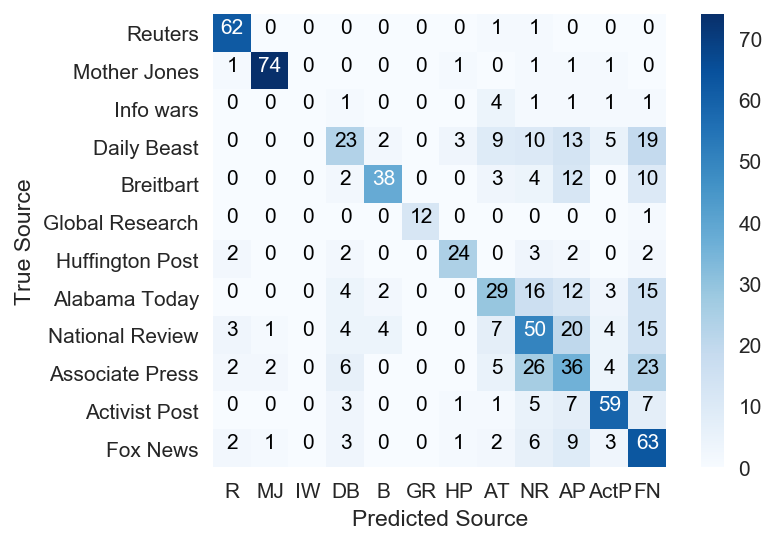

In [28]:
names = ['Reuters', 'Mother Jones', 'Info wars', 'Daily Beast', 'Breitbart',
       'Global Research', 'Huffington Post', 'Alabama Today',
       'National Review', 'Associate Press', 'Activist Post', 'Fox News']
plt.figure(dpi=150)
cm = confusion_matrix(y_test, dt.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('R', 'MJ', 'IW', 'DB', 'B',
       'GR', 'HP', 'AT',
       'NR', 'AP', 'ActP', 'FN'))
plt.yticks([0,1,2,3,4,5,6, 7, 8, 9, 10, 11], ('Reuters', 'Mother Jones', 'Info wars', 'Daily Beast', 'Breitbart',
       'Global Research', 'Huffington Post', 'Alabama Today',
       'National Review', 'Associate Press', 'Activist Post', 'Fox News'));
plt.ylabel("True Source")
plt.xlabel("Predicted Source");
fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),#, fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [45]:
with open('cm.pkl', 'wb') as picklefile:
        pickle.dump(cm, picklefile)

In [29]:
X = X.reshape(-1, 1)
cross_val_score(dt, X, y, cv=10, scoring='accuracy')

array([0.65942029, 0.62227603, 0.6407767 , 0.65776699, 0.66019417,
       0.67647059, 0.64215686, 0.60246914, 0.65346535, 0.61881188])

In [29]:
print("Random Forest classification report\n",classification_report(y_test, rf2.predict(X_test)))
print("Bagging Classifier classification report\n",classification_report(y_test, bc.predict(X_test)))
print("Decision Tree classification report\n", classification_report(y_test, dt.predict(X_test)))

Random Forest classification report
                  precision    recall  f1-score   support

  Activist Post       0.94      0.94      0.94        64
  Alabama Today       0.99      0.92      0.95        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.48      0.27      0.35        84
    Daily Beast       0.83      0.55      0.66        69
       Fox News       1.00      0.92      0.96        13
Global Research       0.80      0.69      0.74        35
Huffington Post       0.55      0.36      0.43        81
      Info wars       0.35      0.49      0.41       108
   Mother Jones       0.31      0.39      0.35       104
National Review       0.72      0.71      0.72        83
        Reuters       0.48      0.69      0.57        90

    avg / total       0.60      0.58      0.58       819

Bagging Classifier classification report
                  precision    recall  f1-score   support

  Activist Post       0.86      0.97      0.91        64
  Ala

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
for x in range(50):
    dt = DecisionTreeClassifier(max_depth=25)
    dt.fit(X_train, y_train)
    print(dt.score(X_test, y_test))
    print(dt.score(X_train, y_train))

In [70]:
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [150]:
with open('dt.pkl', 'wb') as picklefile:
        pickle.dump(dt, picklefile)

In [83]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file="tree.dot") 

In [113]:
dt.predict(78)
    

array(['Reuters'], dtype=object)

In [ ]:
len(check)

In [30]:
X = X.reshape(-1, 1)
cross_val_score(bc, X, y, cv=10, scoring='accuracy')

array([0.66183575, 0.62469734, 0.63834951, 0.66990291, 0.65776699,
       0.67156863, 0.64215686, 0.60987654, 0.65594059, 0.62128713])

In [59]:
with open('bc.pkl', 'wb') as picklefile:
        pickle.dump(bc, picklefile)

In [67]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.249
                 precision    recall  f1-score   support

  Activist Post       0.23      0.74      0.34        95
  Alabama Today       0.24      0.89      0.38        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.53      0.40      0.46       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.58      0.11      0.19        98
        Reuters       0.18      0.27      0.21       104

    avg / total       0.20      0.25      0.17       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.133
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.38      0.06      0.10       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.13      0.99      0.23       104

    avg / total       0.06      0.13      0.04       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.122
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.12      1.00      0.22       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.01      0.12      0.03       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

model = LinearSVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))



Accuracy: 0.117
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.08      0.75      0.15        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.19      0.49      0.28       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.03      0.12      0.05       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
model = SVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.596
                 precision    recall  f1-score   support

  Activist Post       0.86      0.95      0.90        95
  Alabama Today       0.90      0.92      0.91        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.57      0.21      0.30        63
    Daily Beast       1.00      0.51      0.67        75
       Fox News       1.00      0.96      0.98        25
Global Research       0.68      0.68      0.68        37
Huffington Post       0.51      0.45      0.47        74
      Info wars       0.58      0.46      0.51       100
   Mother Jones       0.26      0.59      0.36        85
National Review       0.84      0.60      0.70        98
        Reuters       0.43      0.51      0.47       104

    avg / total       0.66      0.60      0.61       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=14)
knn.fit(X_train, y_train) 
## And score it on your testing data.
knn.score(X_test, y_test)

0.5616605616605617

In [49]:
with open('knn.pkl', 'wb') as picklefile:
        pickle.dump(knn, picklefile)

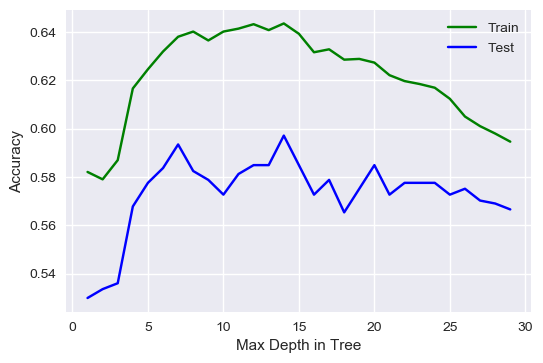

In [46]:
train_score = []
test_score = []

for neighbors in range(1, 30):
    knn = KNeighborsClassifier(n_jobs= -1, n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    
plt.figure(dpi=100)
plt.plot(range(1, 30), train_score, 'g', label="Train")
plt.plot(range(1, 30), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

In [71]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
print("Accuracy: %.3f"% accuracy_score(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy: 0.567
                 precision    recall  f1-score   support

  Activist Post       0.88      0.88      0.88        64
  Alabama Today       0.79      0.82      0.81        79
Associate Press       0.00      0.00      0.00         9
      Breitbart       0.53      0.25      0.34        84
    Daily Beast       0.73      0.55      0.63        69
       Fox News       0.92      0.92      0.92        13
Global Research       0.49      0.57      0.53        35
Huffington Post       0.51      0.30      0.37        81
      Info wars       0.59      0.58      0.59       108
   Mother Jones       0.36      0.44      0.40       104
National Review       0.59      0.72      0.65        83
        Reuters       0.41      0.66      0.50        90

    avg / total       0.57      0.57      0.56       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
os.system('say "Your move.....Commander"')

In [149]:
dt.predict(6)

array(['Mother Jones'], dtype=object)